## Predicciones para el mejor modelo de cada tipo combustible (Consumo e Importación)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from prophet import Prophet

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Cargar DataFrames

In [2]:
df_consumo = pd.read_csv('./df_consumo.csv', index_col='Fecha', parse_dates=True)
df_importacion = pd.read_csv('./df_importacion.csv', index_col='Fecha', parse_dates=True)

### Datos de Train y Test para ambos DataFrames

In [3]:
train_size_con = int(len(df_consumo) * 0.7)
train_consumo = df_consumo.iloc[:train_size_con]
test_consumo = df_consumo.iloc[train_size_con:]

In [4]:
train_size_imp = int(len(df_importacion) * 0.7)
train_importacion = df_importacion.iloc[:train_size_imp]
test_importacion = df_importacion.iloc[train_size_imp:]

### Transformación Logarítmica para ambos DataFrames

In [5]:
train_consumo_log = train_consumo.apply(np.log1p)
train_importacion_log = train_importacion.apply(np.log1p)

### Modelos de Predicción para las 6 series de tiempo realizadas

<p> Modelo para Gasolina Regular (consumo)</p>

In [7]:
serie = train_consumo_log['Gasolina regular']

In [ ]:
regular_consumo = SARIMAX(serie, order=(1,0,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_regular_consumo = regular_consumo.fit()
print(res_regular_consumo.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0003      0.000   6942.967      0.000       1.000       1.001
ma.L1         -0.7046      0.050    -14.063      0.000      -0.803      -0.606
sigma2         0.0074      0.001     11.994      0.000       0.006       0.009


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


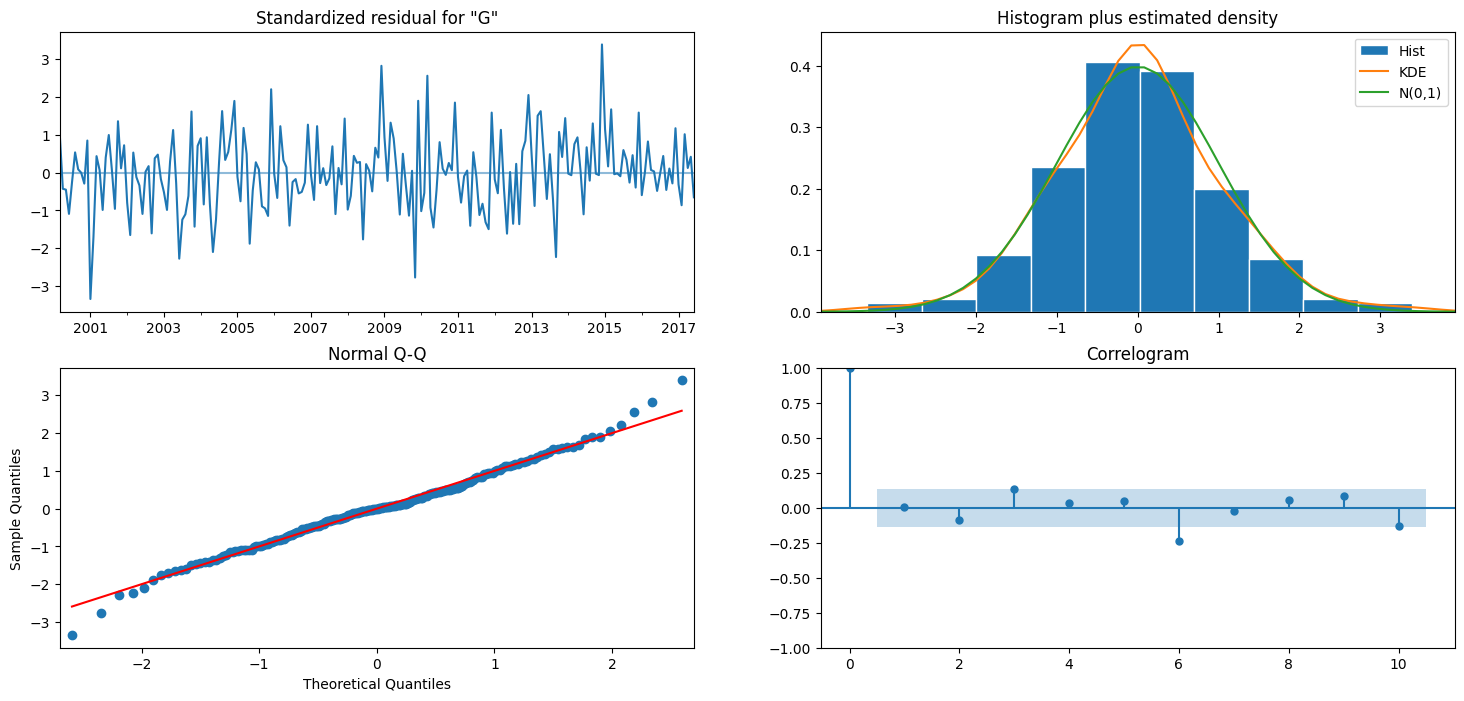

In [9]:
res_regular_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [10]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_regular_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_regular_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -423.71102048765607
Resultados de BIC (Bayesian information criterion)
Modelo 122= -413.69840624855215


<p> Modelo para Gasolina Superior (Consumo)</p>

In [15]:
serie = train_consumo_log['Gasolina superior']

In [16]:
superior_consumo = SARIMAX(serie, order=(2,0,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_superior_consumo = superior_consumo.fit()
print(res_superior_consumo.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9286      0.103      9.040      0.000       0.727       1.130
ar.L2          0.0716      0.103      0.697      0.486      -0.130       0.273
ma.L1         -0.7327      0.064    -11.370      0.000      -0.859      -0.606
sigma2         0.0045      0.000     11.316      0.000       0.004       0.005


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


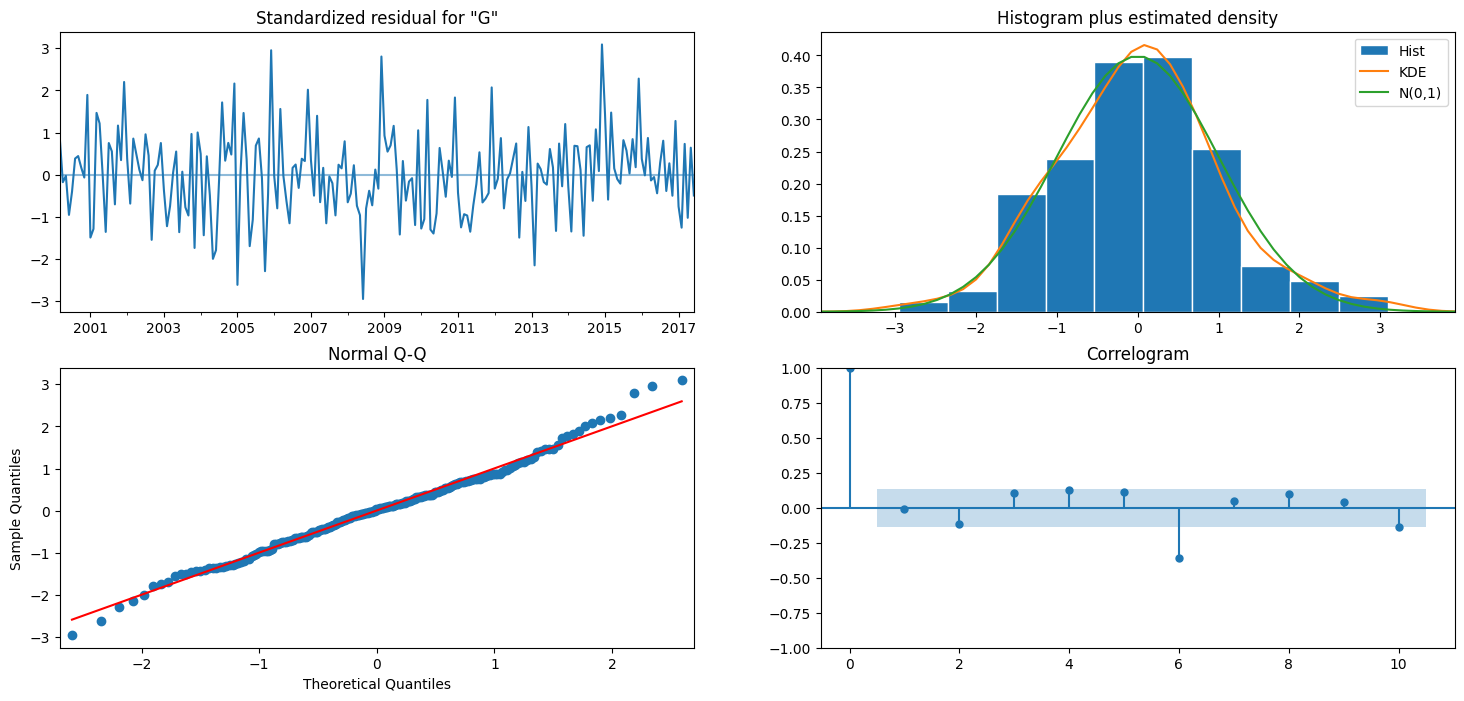

In [17]:
res_superior_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_superior_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_superior_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -522.9907371205202
Resultados de BIC (Bayesian information criterion)
Modelo 122= -509.6405848017149


<p> Modelo para Diesel (Consumo)</p>

In [22]:
serie = train_consumo_log['Diesel']

In [23]:
diesel_consumo = SARIMAX(serie, order=(2,1,2), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_diesel_consumo = diesel_consumo.fit()
print(res_diesel_consumo.summary().tables[1])

c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2133      0.165     -1.295      0.195      -0.536       0.110
ar.L2          0.5183      0.135      3.836      0.000       0.253       0.783
ma.L1          0.2211      0.212      1.042      0.297      -0.195       0.637
ma.L2         -1.0828      0.194     -5.596      0.000      -1.462      -0.704
sigma2         0.0060      0.002      2.728      0.006       0.002       0.010


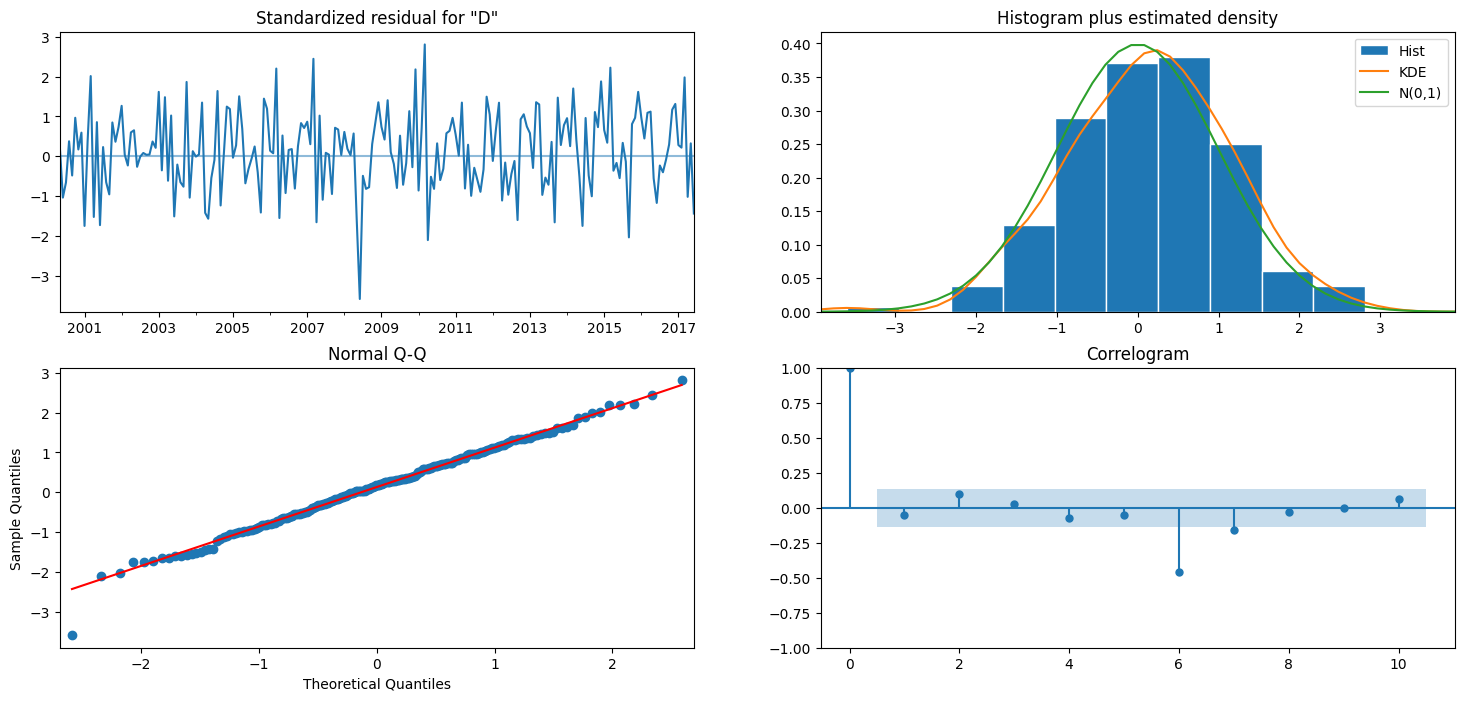

In [24]:
res_diesel_consumo.plot_diagnostics(figsize=(18, 8))
plt.show()

In [25]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_diesel_consumo.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_diesel_consumo.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -397.9836819843443
Resultados de BIC (Bayesian information criterion)
Modelo 122= -381.3443011403964


<p> Modelo para Gasolina Regular (Importación)</p>

In [26]:
serie = train_importacion_log['Gasolina regular']

In [27]:
regular_importacion = SARIMAX(serie, order=(2,0,2), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_regular_importacion = regular_importacion.fit()
print(res_regular_importacion.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3242      0.200      1.618      0.106      -0.069       0.717
ar.L2          0.6766      0.201      3.373      0.001       0.283       1.070
ma.L1         -0.4260      0.226     -1.883      0.060      -0.870       0.017
ma.L2         -0.4527      0.216     -2.094      0.036      -0.876      -0.029
sigma2         0.0788      0.007     10.812      0.000       0.065       0.093


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


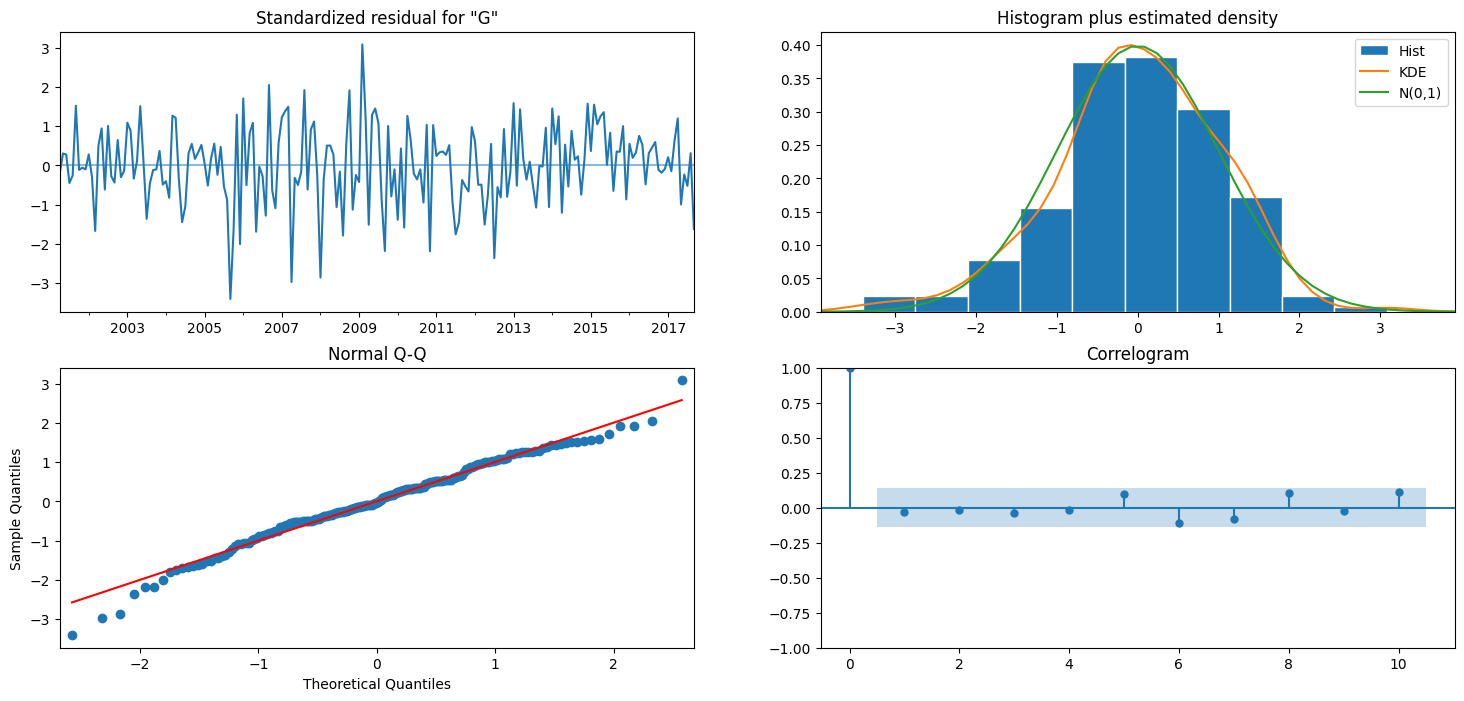

In [28]:
res_regular_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [29]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_regular_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_regular_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= 70.42478139257989
Resultados de BIC (Bayesian information criterion)
Modelo 122= 86.86611654605257


<p> Modelo para Gasolina Superior (Importación)</p>

In [30]:
serie = train_importacion_log['Gasolina superior']

In [31]:
superior_importacion = SARIMAX(serie, order=(2,1,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_superior_importacion = superior_importacion.fit()
print(res_superior_importacion.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3612      0.102     -3.530      0.000      -0.562      -0.161
ar.L2          0.0725      0.093      0.778      0.437      -0.110       0.255
ma.L1         -0.8437      0.059    -14.373      0.000      -0.959      -0.729
sigma2         0.0512      0.005      9.631      0.000       0.041       0.062


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


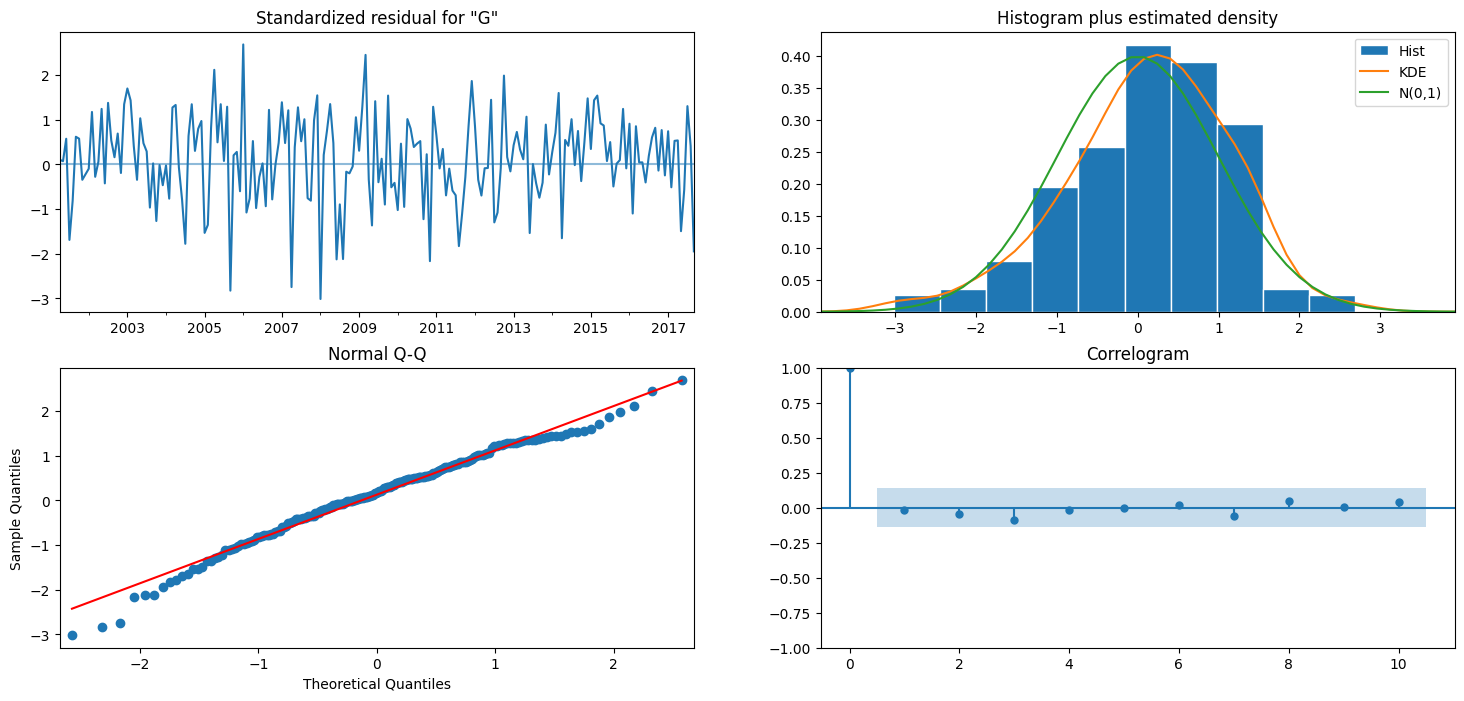

In [32]:
res_superior_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [33]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_superior_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_superior_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= -17.2810540109791
Resultados de BIC (Bayesian information criterion)
Modelo 122= -4.127985888200961


<p> Modelo para Diesel (Importación)</p>

In [34]:
serie = train_importacion_log['Diesel']

In [35]:
diesel_importacion = SARIMAX(serie, order=(1,0,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
res_diesel_importacion = diesel_importacion.fit()
print(res_diesel_importacion.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0003   8.51e-05   1.17e+04      0.000       1.000       1.000
ma.L1         -0.9465      0.024    -39.886      0.000      -0.993      -0.900
sigma2         0.0693      0.006     10.881      0.000       0.057       0.082


c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ncast\OneDrive\Documentos\Universidad\Data Science\Lab01-DS\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


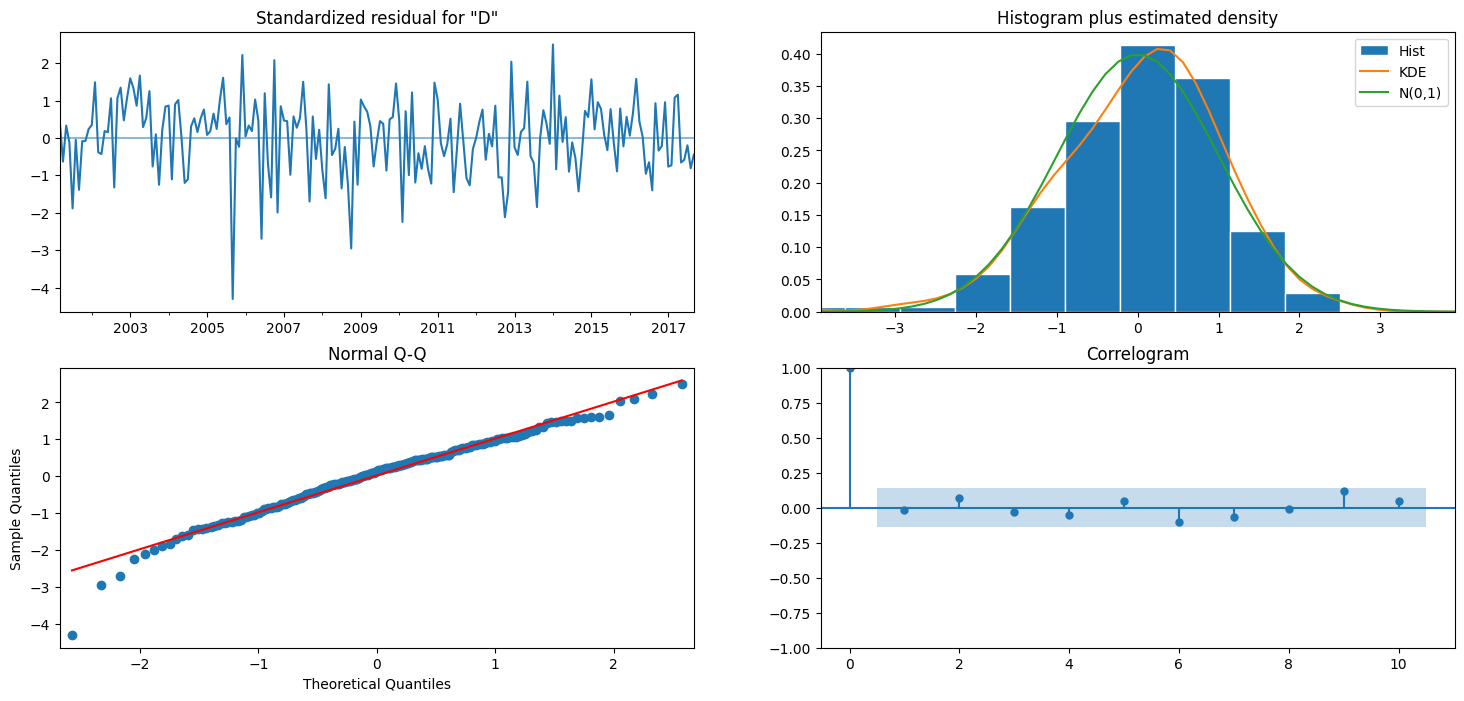

In [36]:
res_diesel_importacion.plot_diagnostics(figsize=(18, 8))
plt.show()

In [37]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 122=",res_diesel_importacion.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 122=",res_diesel_importacion.bic)

Resultados de AIC (Akaike information criterion)
Modelo 122= 41.77983842682014
Resultados de BIC (Bayesian information criterion)
Modelo 122= 51.65975290099362
